# Linear Regression

## From Scratch

The first model most people will get introduced too when exploring Data Science and Machine Learning is Linear Regression. If you have wondered into this notebook and do not yet understand simple linear regression I recommend going to the other notebook in this folder "Simple Linear Regression Scratch". In that notebook I address the math behind linear regression and how it operates. In this notebook we are going to build off of that understanding by introducing more than one independent variable. The math builds off of the simple model example and we will introduce a few other techniques to optimizing the models performance

# Multivariate Linear Regression

Multiple Linear Regression is linear regression when there are multiple inputs or dependent variables. hence the name "multi"variate. the approach is the same as the simple model with a few adaptions.

### Before We Start
After understanding how a simple linear regression works my undergaduate degree didn't hesitate to remind me that it is unlikely that I will be dealing with more than one input variable. Which begs the question.. how can we introduce more variables into the model? The answer is straight forward, but to build the model we will need an understanding of matrix algebra. So, if you are new to matrix algebra be sure to dive into the subject from accredited sources. 

## Understanding the Mathematics

Let's first review the mathematical represenation of the simple linear model:
<br>
$Y={\beta_0}+{\beta_1}X$

<br>
${\beta_0}$: Coefficient

<br>
${\beta_1}$: Bias Coefficient

<br>
so if we wanted to introduce more dependent variables how would we do that in above equation? you guessed it. we would add another ${\beta}$ multiplied by another X as needed

so our multivariate equation would look like:

<br>
$Y={\beta_0}+{\beta_1}{X_1}+{\beta_2}{X_2}+{\beta_3}{X_3}+...+{\beta_n}{X_n}$

<br>
${\beta_0}$: The constant or intercept
<br>
${\beta_1}$: The slope of the first independent variable
<br>
${\beta_2}$: The slope of the second independent variable
<br>
${\beta_3}$: The slope of the third independent variable
<br>
${\beta_n}$: The slope of the "nth" independent variable
<br>
${X_1}$: First independent variables explaining the change in Y
<br>
${X_2}$: Second independent variables explaining the change in Y
<br>
${X_3}$: Third independent variables explaining the change in Y
<br>
${X_n}$: "nth" independent variables explaining the change in Y
<br>

now we can use basic mathematics if we set ${x_0}$=1. now lets state: ${\beta_0}$ = ${\beta_0}{x_0}$ so now we have:
<br>

$Y={\beta_0}{x_0}+{\beta_1}{X_1}+{\beta_2}{X_2}+{\beta_3}{X_3}+...+{\beta_n}{X_n}$
<br>

now comes the matrix algebra. we need to convert this equation into matrix form so that we can code it.
<br>
Matrix Form:
<br>

$Y={\beta^T}X$
<br>

${\beta}=[{\beta_0} {\beta_1} {\beta_2} {\beta_3} ... {\beta_n}]^T$
<br>
${X}=[{X_0} {X_1} {X_2} {X_3} ... {X_n}]^T$
<br>

Perfect now that we have our equation in matrix form we need to define a cost function. The cost function will give the error of the model. we will define our cost function with the image below

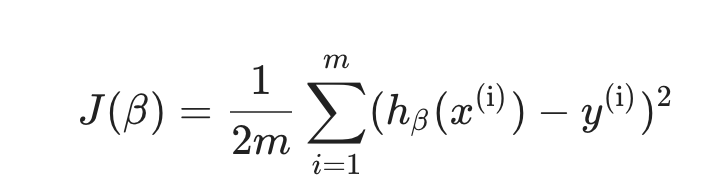

In [1]:
from IPython.display import Image
Image('/Users/connerleavitt/Desktop/Screen Shot 2019-09-10 at 9.00.35 PM.png')

So, as intution has probably told you, we want to minimize the cost. There is a popular method in minimizing the cost known as gradient descent. This is a very popular function so go to an acredited source to understand the in's and out's of this function if you are not familar with it already.

<br>
We want to first initialize the values of ${\beta}$ with 0. Then we want to update the ${\beta}'s$ as an interative process. So our cost function transforms into the image below:

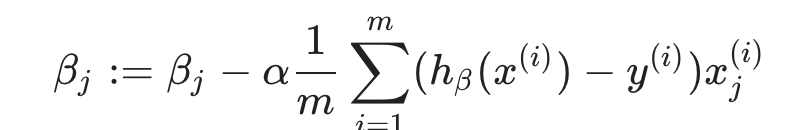

In [2]:
from IPython.display import Image
Image('/Users/connerleavitt/Desktop/Screen Shot 2019-09-10 at 9.10.13 PM.png')

alpha is the learning rate

# Coding the model
We have gotten a mathematical definition of what we want to do and we have the matrix algebra translation. We have defined our cost funcition and our function to minimize that cost. so now we are ready to code the model in python. 

In [3]:
#packages and libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
#read in the data
data = pd.read_csv('/Users/connerleavitt/Desktop/Cool-Code/student.csv')

In [4]:
#check the data
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [7]:
#write the subject scores to their own array's
math = data['Math']
read = data['Reading']
write = data['Writing']

#generate our X, Y, Beta
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
#learning rate
alpha = 0.0001

#define our cost function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) **2)/(2 * m)
    return J


alright now that we have the first few step finished lets see what we are working with by finding out what are initial cost is.

In [8]:
cost_1 = cost_function(X, Y, B)
cost_1

2470.11

Alright, that is a large cost, but at least we have an idea of where we are starting. So if we can minimize the cost then we are heading in the right direction. Let's use gradient descent to lower our cost 

In [15]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iterations in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iterations] = cost
    return B, cost_history

Now lets get our final ${\beta}$ value

In [16]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

print(newB)

print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


so we can say our equation looks like: ${S_w} = -0.4789+0.0913*{S_m}+0.9014*{S_r}$
<br>

Let's evaluate our model with RMSE and ${R^2}$. I have already discussed the math behind these calculations in the simple linear regression notebook so refer back to that if you do not remember. I will write the functions below

In [17]:
#RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

#R2
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y- mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2
#define Y_pred
Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2(Y, Y_pred))

4.577143972727789
0.9097223273061553


Nice we have a very low RMSE. Our model is not half bad. But lets compare it to Scikit-learn's linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


So Scikit-learn's model barely out performs the one from scratch, but it is close enough to call our model from scratch a success.